# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
print(mouse_metadata.shape)
display(mouse_metadata.head(2))
study_results = pd.read_csv(study_results_path)
print(study_results.shape)
display(study_results.head(2))

# Combine the data into a single DataFrame
mouse_metadata['Mouse ID'] = mouse_metadata['Mouse ID'].str.strip()
study_results['Mouse ID'] = study_results['Mouse ID'].str.strip()

mouse_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')
mouse_df = mouse_df[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',	'Drug Regimen',
                     	'Sex', 'Age_months', 'Weight (g)']]
print(mouse_df.shape)
display(mouse_df.head(2))
# Display the data table for preview


(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df.duplicated(subset= ['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df =mouse_df.loc[mouse_df['Mouse ID'] != 'g989'].reset_index(drop = True).copy()
cleaned_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
grouped_cleaned_mouse_df = cleaned_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
# .rename(columns ={'Tumor Volume (mm3)':'Mean Tumor Volume'})
grouped_cleaned_mouse_df.columns = ['Mean Tumor Volume',	'Median Tumor Volume', 'Tumor Volume Variance',	'Tumor Volume Std. Dev.',	'Tumor Volume Std. Err.']
grouped_cleaned_mouse_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
cleaned_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

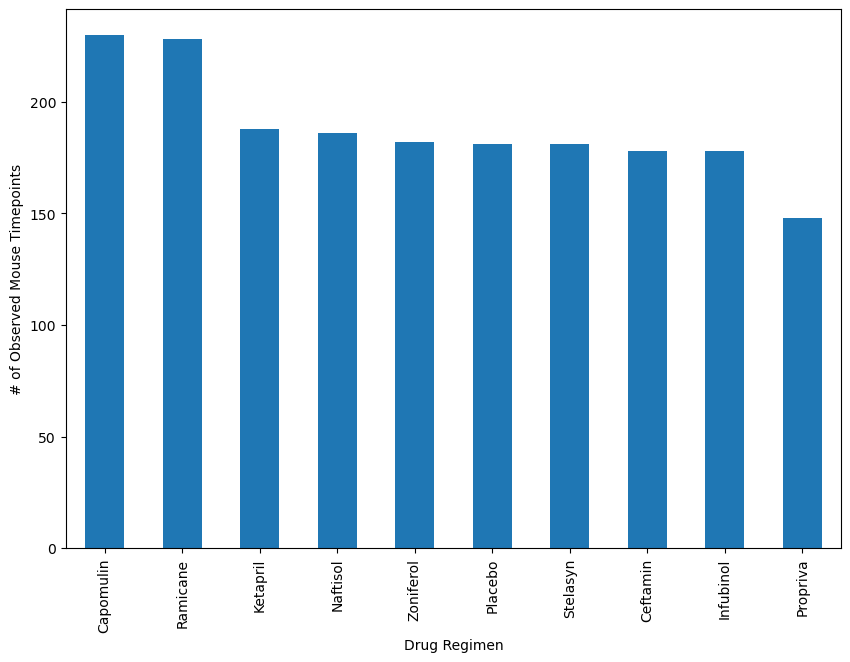

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))

# Assuming you have a DataFrame named df with your data

# Group the DataFrame by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = cleaned_mouse_df.groupby('Drug Regimen')['Mouse ID'].count()

# Sort the counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

# Create a bar plot
drug_regimen_counts.plot(kind='bar', rot=90, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

# # Show the plot
# plt.show()


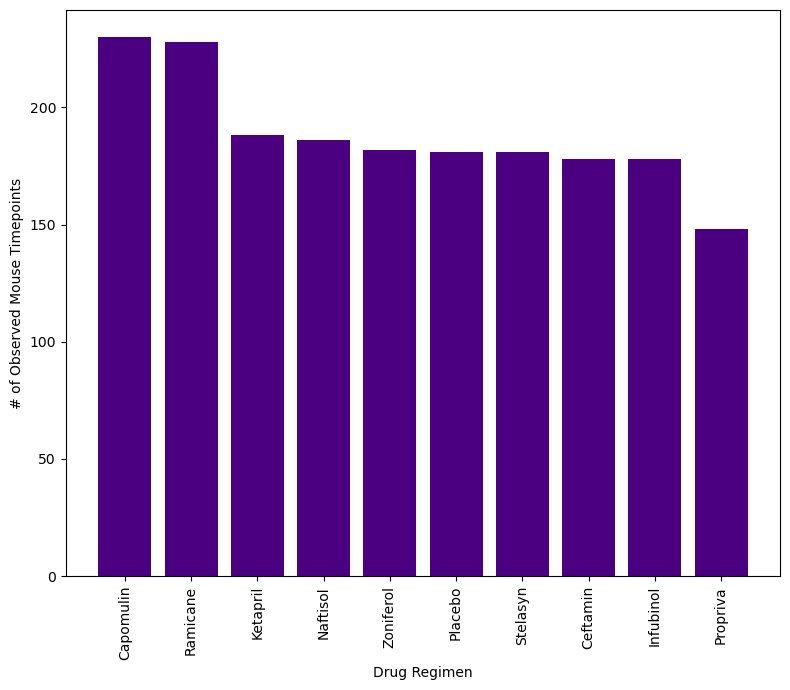

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your data

# Group the DataFrame by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = cleaned_mouse_df.groupby('Drug Regimen')['Mouse ID'].count()

# Sort the counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

# Create a bar plot using pyplot
plt.figure(figsize=(8, 7))  # Set the figure size
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color = 'indigo')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# plt.title('Total Rows per Drug Regimen (Descending Order)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability

# Show the plot
plt.tight_layout()  # Ensures proper spacing of elements in the plot
plt.show()


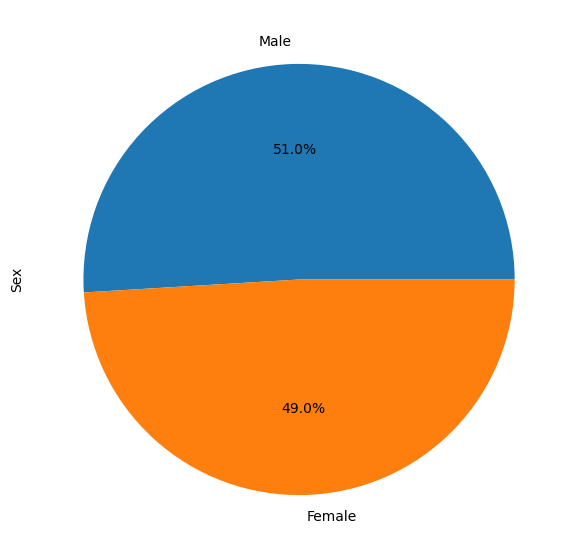

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your data
plt.figure(figsize = (10,7))
# Group the DataFrame by 'Sex' and count the number of mice for each gender
gender_distribution = cleaned_mouse_df['Sex'].value_counts()

# Create a pie plot
gender_distribution.plot(kind='pie',autopct='%1.1f%%');
# plt.title('Distribution of Female vs. Male Mice')

# Show the plot
# plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
# plt.show()

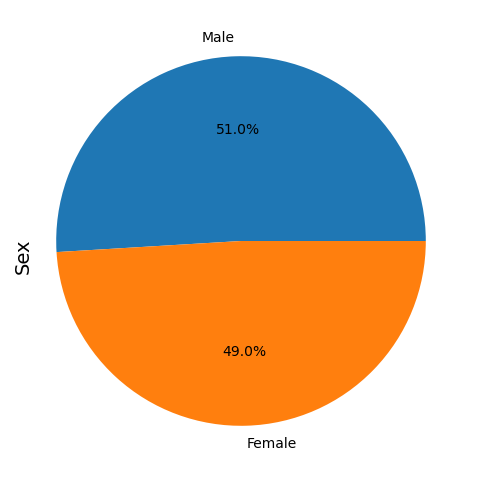

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your data

# Group the DataFrame by 'Sex' and count the number of mice for each gender
gender_distribution = cleaned_mouse_df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))  # Set the figure size
# colors = ['skyblue', 'lightcoral']
labels = ['Male', 'Female']
sizes = gender_distribution.values
plt.pie(sizes, 
        labels=labels, 
        # colors=colors,
          autopct='%1.1f%%'
          )
# plt.title('Sex', loc = 'left', rotation='vertical', pad = 20);
# Add a vertically written title on the left side
plt.suptitle('Sex', x=0.15, y=0.5, rotation='vertical', fontsize=14);

# Show the plot
# plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
# plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
cleaned_mouse_df_subset = cleaned_mouse_df.loc[cleaned_mouse_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])].copy()
cleaned_mouse_df_subset
cleaned_mouse_df_subset1 = cleaned_mouse_df_subset.groupby('Mouse ID').agg({'Timepoint':max})
cleaned_mouse_df_subset1.reset_index()
cleaned_mouse_df_subset1_dictionary1 = pd.merge(cleaned_mouse_df_subset1,cleaned_mouse_df_subset, how='left',on=['Mouse ID', 'Timepoint'])

In [14]:
cleaned_mouse_df_subset1_dictionary1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = cleaned_mouse_df_subset1_dictionary1['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    treatment_data = cleaned_mouse_df_subset1_dictionary1[(cleaned_mouse_df_subset1_dictionary1['Drug Regimen'] == each_treatment)]['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate the lower bound and upper bound for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find potential outliers using the bounds
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

        
    # # Print the results
    print(f"Treatment: {each_treatment}")
    # print(f"Q1: {Q1}")
    # print(f"Q3: {Q3}")
    # print(f"IQR: {IQR}")
    # print(f"Lower Bound: {lower_bound}")
    # print(f"Upper Bound: {upper_bound}")
    # print("Potential Outliers:")
    print(outliers)
    print()
 


Treatment: Infubinol
15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)



In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


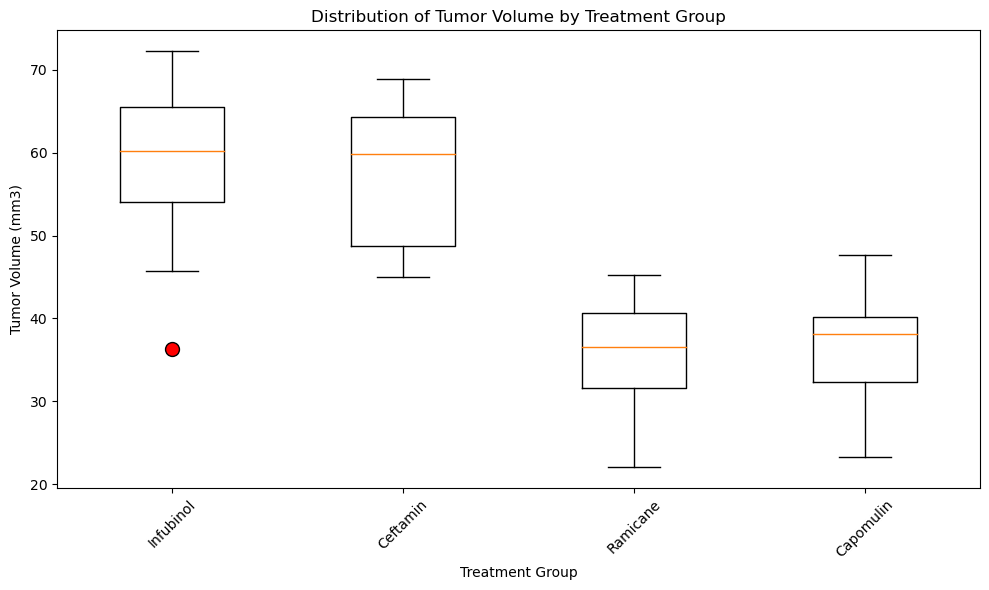

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your data

# Create a list to store tumor volume data for each treatment group
data_by_treatment = []

# Iterate through each treatment in the list
for each_treatment in treatment_list:
    # Filter the DataFrame to get tumor volumes for the current treatment
    treatment_data = cleaned_mouse_df_subset1_dictionary1[(cleaned_mouse_df_subset1_dictionary1['Drug Regimen'] == each_treatment)]['Tumor Volume (mm3)']
    data_by_treatment.append(treatment_data)

# Create a box plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(data_by_treatment, labels=treatment_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment Group')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()  # Ensures proper spacing of elements in the plot
plt.show()


## Line and Scatter Plots

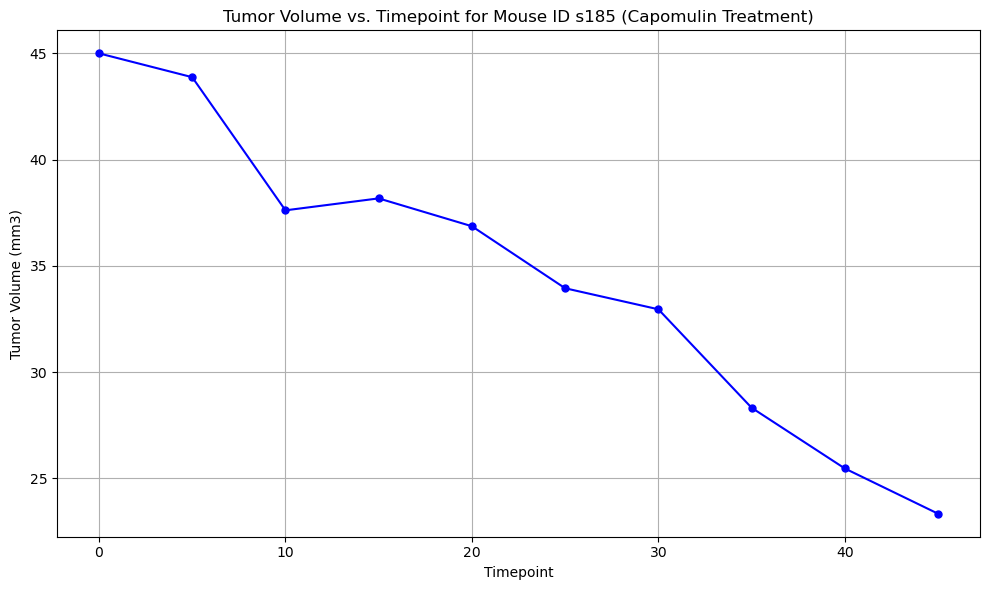

In [18]:
mouse_id ='s185'

capomulin_data = cleaned_mouse_df_subset[(cleaned_mouse_df_subset['Drug Regimen'] == 'Capomulin') &

                                         (cleaned_mouse_df_subset['Mouse ID'] == mouse_id)]


time_points = capomulin_data['Timepoint']

tumor_volumes = capomulin_data['Tumor Volume (mm3)']

plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(time_points, tumor_volumes, marker='o', color='blue', linestyle='-', markersize=5)

plt.xlabel('Timepoint')

plt.ylabel('Tumor Volume (mm3)')

plt.title(f'Tumor Volume vs. Timepoint for Mouse ID {mouse_id} (Capomulin Treatment)')

plt.grid(True)  

plt.tight_layout()

plt.show()

 

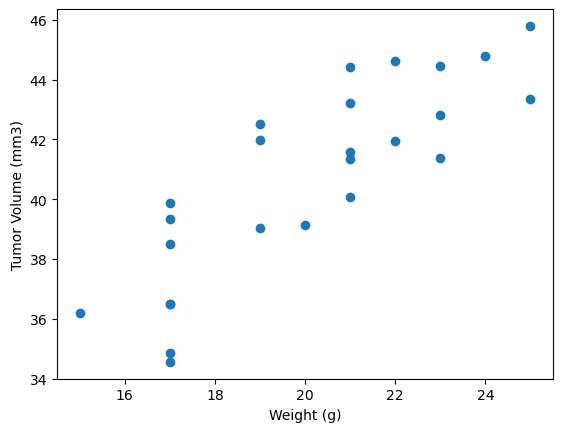

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_df_subset[(cleaned_mouse_df_subset['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID').agg({'Weight (g)':'mean','Tumor Volume (mm3)':'mean'})
capomulin_data
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [22]:
import numpy as np

The correlation between mouse weight and the average tumor volume is 0.84
[ 0.95443969 21.55216053]


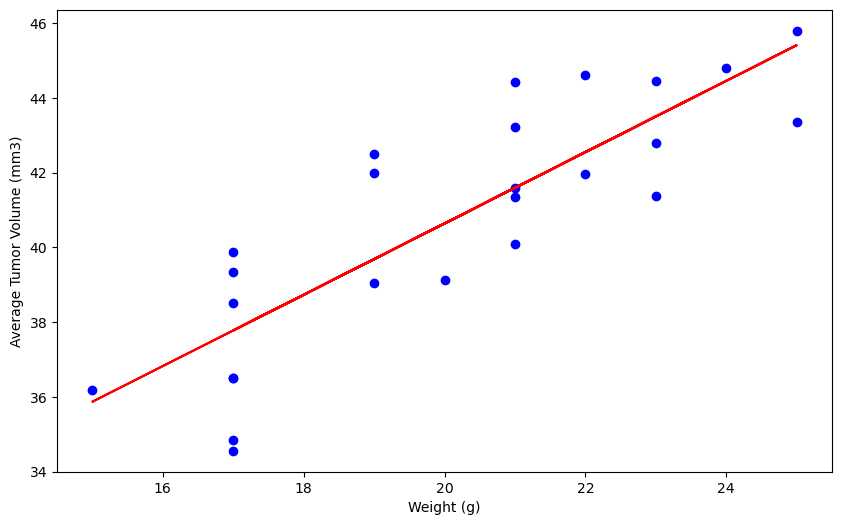

In [23]:
corr_ = round(capomulin_data[['Weight (g)','Tumor Volume (mm3)']].corr()['Tumor Volume (mm3)'][0], 2)

print(f"The correlation between mouse weight and the average tumor volume is {corr_}")

plt.figure(figsize = (10,6))

plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue')

coefficients = np.polyfit(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], 1)

line = np.poly1d(coefficients)

plt.plot(capomulin_data['Weight (g)'], line(capomulin_data['Weight (g)']), color='red', label='Linear Regression')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()